In [365]:
import pandas as pd
import matplotlib.pyplot as plt

In [367]:
test_data = pd.read_csv("covid-19-tests-country.csv")

In [368]:
test_data

,Entity,Total COVID-19 tests
0,Armenia,813
1,Australia,113615
2,Australia - Australian Capital Territory,2062
3,Australia - New South Wales,39089
4,Australia - Queensland,27000
...,...,...
73,United Arab Emirates,125000
74,United Kingdom,64621
75,United States,103945
76,United States - CDC samples tested,37646


### 1. Percentage of total test per country

In [369]:
test_data = test_data.dropna()
test_count = test_data["Total COVID-19 tests"].sum()
test_data["Test Percentage"] = round((test_data["Total COVID-19 tests"] *100 / test_count),2)
test_data = test_data.sort_values(by='Test Percentage', ascending=False)

In [370]:
x_label = [ str(i) + '%' for i in range(20) if i % 2 == 0]
x_label 

['0%', '2%', '4%', '6%', '8%', '10%', '12%', '14%', '16%', '18%']

/Users/Jiyumeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0, 0, '0%'),
 Text(0, 0, '2%'),
 Text(0, 0, '4%'),
 Text(0, 0, '6%'),
 Text(0, 0, '8%'),
 Text(0, 0, '10%'),
 Text(0, 0, '12%'),
 Text(0, 0, '14%')]

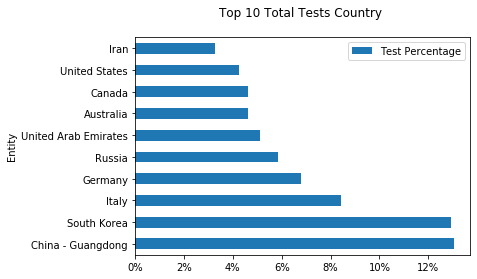

In [371]:
test_data_chart = test_data.iloc[:10]
test_data_chart["x_label"] = test_data_chart["Test Percentage"].map('{:,.2f}%'.format)
test_data_chart.reset_index(drop=True,inplace = True)
test_data_chart.set_index(["x_label"],inplace=True)
ax = test_data_chart.plot.barh("Entity","Test Percentage", title = "Top 10 Total Tests Country \n")
ax.set_xticklabels(x_label)

In [372]:
new_test_data = test_data.copy()

In [373]:
new_test_data['Test Percentage']  = new_test_data['Test Percentage'].map('{:,.2f}%'.format)
new_test_data.reset_index(drop=True,inplace = True)
new_test_data.head(10)

,Entity,Total COVID-19 tests,Test Percentage
0,China - Guangdong,320000,13.05%
1,South Korea,316664,12.91%
2,Italy,206886,8.43%
3,Germany,167000,6.81%
4,Russia,143519,5.85%
5,United Arab Emirates,125000,5.10%
6,Australia,113615,4.63%
7,Canada,113121,4.61%
8,United States,103945,4.24%
9,Iran,80000,3.26%


### 2. Percentage of a thousand people been tested

In [341]:
ppl_data = pd.read_csv("UN-population-projection-medium-variant.csv")

In [342]:
ppl20 = ppl_data[ppl_data["Year"] == 2020]
ppl20 = ppl20.drop(['Estimates, 1950 - 2015: Total population by broad age group, both sexes combined (thousands) - Total'], axis=1)

In [338]:
chart_x_label = [ str(i) + '%' for i in range(30) if i % 5 == 0]
chart_x_label 

['0%', '5%', '10%', '15%', '20%', '25%']

/Users/Jiyumeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0, 0, '0%'),
 Text(0, 0, '5%'),
 Text(0, 0, '10%'),
 Text(0, 0, '15%'),
 Text(0, 0, '20%'),
 Text(0, 0, '25%')]

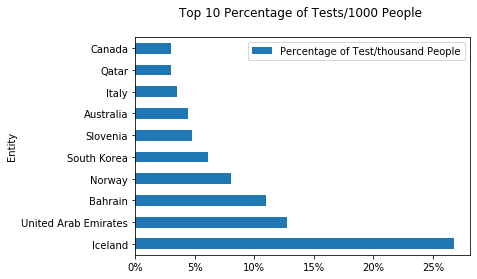

In [350]:
test_df_chart = test_df.iloc[:10]
test_df_chart["chart_x_label"] = test_df_chart["Percentage of Test/thousand People"].map('{:,.2f}%'.format)
test_df_chart.reset_index(drop=True,inplace = True)
test_df_chart.set_index(["chart_x_label"],inplace=True)
ax = test_df_chart.plot.barh("Entity","Percentage of Test/thousand People",title = "Top 10 Percentage of Tests/1000 People \n")
ax.set_xticklabels(chart_x_label)

In [ ]:
new_test_df_chart = test_df_chart.copy()

In [ ]:
new_test_df_chart['Test Percentage']  = test_df_chart['Percentage of Test/thousand People'].map('{:,.2f}%'.format)
new_test_df_chart.reset_index(drop=True,inplace = True)
del new_test_df_chart["Percentage of Test/thousand People"]
new_test_df_chart.head(10)

### 3. Correlation between total tests & confirmed cases

In [378]:
confirmed_case = pd.read_csv("covid_19_data.csv")
confirmed_case

,ObservationDate,Country/Region,Confirmed
0,1/22/20,Mainland China,1
1,1/22/20,Mainland China,14
2,1/22/20,Mainland China,6
3,1/22/20,Mainland China,1
4,1/22/20,Mainland China,0
...,...,...,...
6157,3/16/20,UK,1
6158,3/16/20,UK,1
6159,3/16/20,Australia,0
6160,3/16/20,US,0


In [421]:
confirmed_data = confirmed_case.groupby(["Country/Region"]).sum()
confirmed_data = confirmed_data.sort_values(by='Confirmed', ascending=False)
confirmed_data = confirmed_data.dropna()

In [423]:
merged_data = test_data.merge(confirmed_data,left_on="Entity",right_on="Country/Region",how="left")
top_merged_data  = merged_data.iloc[0:20]

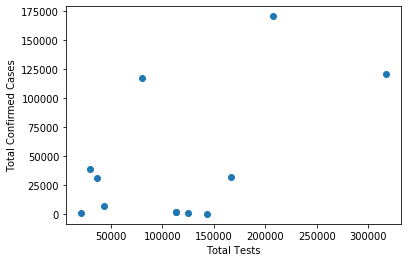

In [432]:
plt.scatter(top_merged_data["Total COVID-19 tests"],top_merged_data["Confirmed"])
# plt.plot(top_merged_data["Total COVID-19 tests"],top_merged_data["Confirmed"],"--")
plt.xlabel('Total Tests')
plt.ylabel("Total Confirmed Cases")
plt.show()